# Contours

In [7]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [29]:
img_path = os.path.join('..', '..', 'pics', 'countour.png')
img = cv.imread(img_path)
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Make countours

In [30]:
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

## Draw countours

(-0.5, 299.5, 204.5, -0.5)

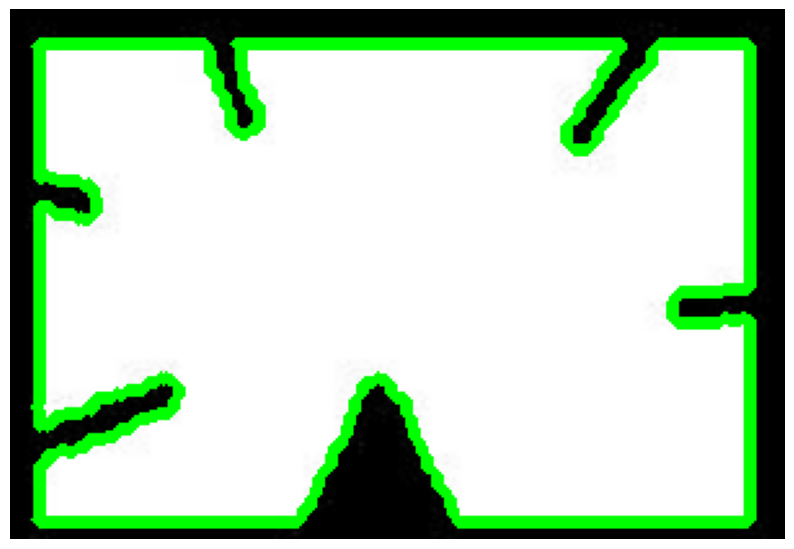

In [31]:
img_with_contours = img.copy()
cv.drawContours(img_with_contours, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(img_with_contours, cv.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
# To draw all the contours in an image:
cv.drawContours(img, contours, -1, (0,255,0), 3)

SyntaxError: invalid syntax (3629139910.py, line 1)

In [ ]:
# To draw an individual contour, say 4th contour:
cv.drawContours(img, contours, 3, (0,255,0), 3)

In [ ]:
# cnt - countours
cv.drawContours(img, [cnt], 0, (0,255,0), 3)

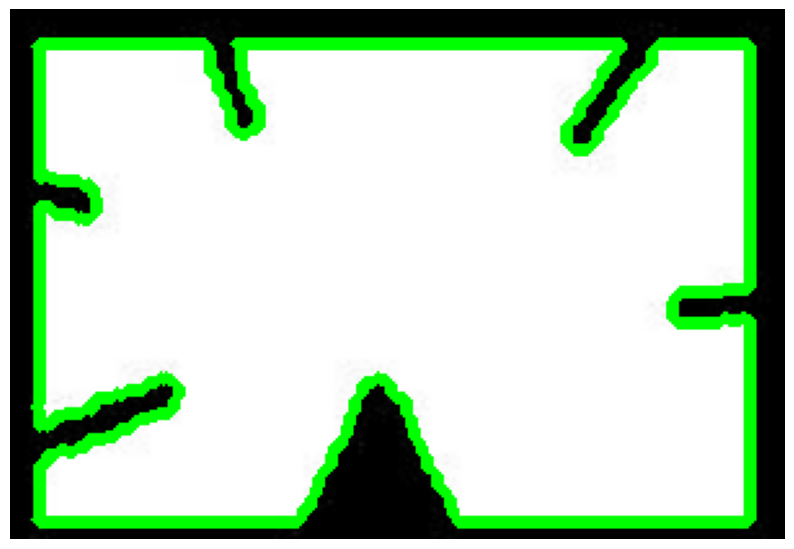

In [32]:
img_with_contours = img.copy()
num_contours_to_draw = 30
contours_to_draw = contours[:num_contours_to_draw] 

cv.drawContours(img_with_contours, contours_to_draw, -1, (0, 255, 0), 3)

plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(img_with_contours, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Countour features

### Moments

In [27]:
ret, thresh = cv.threshold(imgray,127,255,0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
 
cnt = contours[30]
M = cv.moments(cnt)
#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])

### Contour Area

In [28]:
area = cv.contourArea(cnt)
area

6.0

### Contour Perimeter

In [33]:
area = cv.contourArea(cnt)
area

6.0

### Contour Approximation

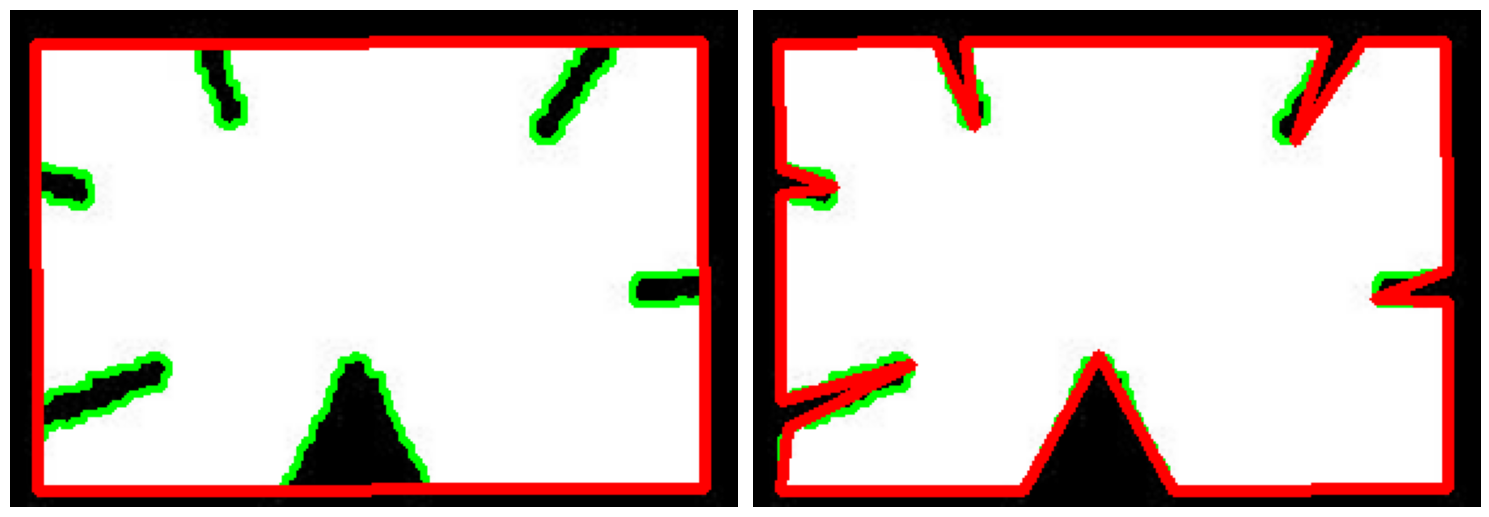

In [36]:
cnt = contours[0]
epsilon1 = 0.1 * cv.arcLength(cnt, True)
approx1 = cv.approxPolyDP(cnt, epsilon1, True)
    
epsilon2 = 0.01 * cv.arcLength(cnt, True)
approx2 = cv.approxPolyDP(cnt, epsilon2, True)
    
img1 = img.copy()
img2 = img.copy()
    
cv.drawContours(img1, [cnt], -1, (0, 255, 0), 2)  
cv.drawContours(img1, [approx1], -1, (0, 0, 255), 3)  
    
cv.drawContours(img2, [cnt], -1, (0, 255, 0), 2) 
cv.drawContours(img2, [approx2], -1, (0, 0, 255), 3)  
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
ax1.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax1.axis('off')
    
ax2.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax2.axis('off')
plt.tight_layout()
plt.show()

### Convex Hull

In [ ]:
hull = cv.convexHull(cnt)

### Checking Convexity

In [38]:
k = cv.isContourConvex(cnt)
k

False

### Straight Bounding Rectangle

In [ ]:
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

### Rotated Rectangle

In [ ]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

### Minimum Enclosing Circle

In [ ]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(0,255,0),2)

### Fitting an Ellipse

In [ ]:
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(0,255,0),2)

### Fitting a Line

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

### Convexity Defects

In [ ]:
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
 
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)
 
cv.imshow('img',img)

### Point Polygon Test
This function finds the shortest distance between a point in the image and a contour

In [ ]:
dist = cv.pointPolygonTest(cnt,(50,50),True)

### Match Shapes

In [ ]:
img1 = cv.imread('star.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('star2.jpg', cv.IMREAD_GRAYSCALE)
 
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
 
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )